In [6]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import dask 
import pandas as pd
import xrft 
from scipy.interpolate import griddata

from scipy.ndimage import gaussian_filter as gauss

import cftime
from pyspec import spectrum as spec

from matplotlib.colors import LogNorm

In [7]:
xmon=1
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'*2012*.nc');listm.sort()
varf=xr.open_dataset(listm[xmon],decode_times=False)
# varf=xr.open_mfdataset(listm)


path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'*2012*.nc');listt.sort()
vart=xr.open_dataset(listt[xmon],decode_times=False)
# vart=xr.open_mfdataset(listt)

/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'u' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'v' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'w' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'temp' has multiple fill values {1e+33, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/homes/metogra/iufarias/miniconda

In [8]:
Tf=varf.temp
Tt=vart.temp
# plt.contourf(varf.u[0,0,:,:])
# plt.colorbar()

In [9]:
Tfx=Tf[0,:,:,:850].sum(axis=0)
Ttx=Tt[0,:,:,:850].sum(axis=0)



In [16]:
spf = spec.TWODimensional_spec(Tfx,0.1,0.1)
spt = spec.TWODimensional_spec(Ttx,0.1,0.1)


ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)


NameError: name 'varr' is not defined

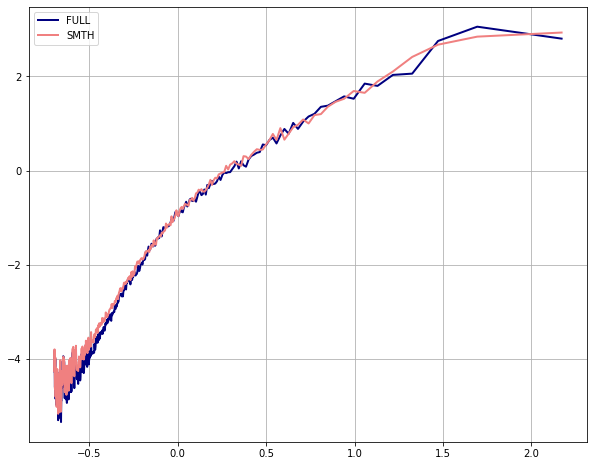

In [17]:
plt.figure(figsize=(10,8))


plt.plot(np.log10(1/ispf[0]),np.log10(ispf[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/ispt[0]),
        np.log10(ispt[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('Full Period {0}'.format(varr))

plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()